<a href="https://colab.research.google.com/github/call493/MLFC/blob/main/_notebooks/01-geospatial-practical.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Practical 1: Nyeri to Cambridge - Geospatial Data and Reusability

### Radzim Sendyka, University of Cambridge

### [Neil D. Lawrence](http://inverseprobability.com), University of

Cambridge

### Christian Cabrera, University of Cambridge

### 2025-09-01

**Abstract**: In this lab session we will explore geospatial data using
OpenStreetMap, create reusable code for data science pipelines, and
apply machine learning to classify locations based on geographic
features.

$$
$$

<!-- Do not edit this file locally. -->
<!-- Do not edit this file locally. -->
<!---->
<!-- Do not edit this file locally. -->
<!-- Do not edit this file locally. -->
<!-- The last names to be defined. Should be defined entirely in terms of macros from above-->
<!--

-->

# Geospatial Data and Machine Learning

## OSMnx Setup

<span class="editsection-bracket" style="">\[</span><span
class="editsection"
style=""><a href="https://github.com/lawrennd/snippets/edit/main/_software/includes/osmnx-setup.md" target="_blank" onclick="ga('send', 'event', 'Edit Page', 'Edit', 'https://github.com/lawrennd/snippets/edit/main/_software/includes/osmnx-setup.md', 13);">edit</a></span><span class="editsection-bracket" style="">\]</span>

We start by installing some Python packages. We’ll use OSMnx, a Python
package that makes it easy to download, model, analyze, and visualize
street networks and other spatial data from OpenStreetMap.

In [26]:
%%capture
%pip install osmnx

In [27]:
import osmnx as ox
import matplotlib.pyplot as plt
import warnings
import math
warnings.filterwarnings("ignore", category=FutureWarning, module='osmnx')

OSMnx provides a powerful interface to OpenStreetMap data, allowing us
to programmatically access geographic information that would otherwise
require manual browsing of the OpenStreetMap website.

<https://www.openstreetmap.org/search?query=nyeri>

## Geospatial Data

<span class="editsection-bracket" style="">\[</span><span
class="editsection"
style=""><a href="https://github.com/lawrennd/snippets/edit/main/_datasets/includes/osm-cities-data-intro.md" target="_blank" onclick="ga('send', 'event', 'Edit Page', 'Edit', 'https://github.com/lawrennd/snippets/edit/main/_datasets/includes/osm-cities-data-intro.md', 13);">edit</a></span><span class="editsection-bracket" style="">\]</span>

In data science and machine learning geospatial data is particularly
common and important. Location is the most shared between datasets. Many
good example datasets, and easy to contextualise and visualise.

Open Street Maps (OSM) is an open geographic database that can provide
useful information about different locations and places on the planet.
In this example, we will download data about Nyeri, Kenya and compare it
with Cambridge, England.

Geospatial data provides rich information about the world around us. It
can help us understand patterns in urban development, economic activity,
cultural differences, and infrastructure distribution. By analyzing
features like amenities, buildings, and points of interest, we can build
machine learning models that capture the essence of different places.

## OpenStreetMap Data

<span class="editsection-bracket" style="">\[</span><span
class="editsection"
style=""><a href="https://github.com/lawrennd/snippets/edit/main/_datasets/includes/openstreetmap-data.md" target="_blank" onclick="ga('send', 'event', 'Edit Page', 'Edit', 'https://github.com/lawrennd/snippets/edit/main/_datasets/includes/openstreetmap-data.md', 13);">edit</a></span><span class="editsection-bracket" style="">\]</span>

We will download data of Nyeri, Kenya, which has the following latitude
and longitude.

In [28]:
place_name = "Nyeri, Kenya"
latitude = -0.4371
longitude = 36.9580
placestub = place_name.lower().replace(' ', '-').replace(',','')

We’ll create a bounding box which is 0.02 degrees wide, 1 degree is
around 111km (circumference of the Earth is around 40,000 km and
40,000/360=111km). Note: will this approximation work well in all
countries?

In [29]:
box_width = 0.1 # About 11 km
box_height = 0.1
north = latitude + box_height/2
south = latitude - box_height/2
west = longitude - box_width/2
east = longitude + box_width/2
bbox = (west, south, east, north)

This bounding box defines the geographic area we want to analyze. The
choice of size is important - too small and we miss important context,
too large and we may include irrelevant features or face performance
issues.

## Downloading and Visualizing Geospatial Data

## Points of Interest Extraction

<span class="editsection-bracket" style="">\[</span><span
class="editsection"
style=""><a href="https://github.com/lawrennd/snippets/edit/main/_datasets/includes/poi-extraction-osm.md" target="_blank" onclick="ga('send', 'event', 'Edit Page', 'Edit', 'https://github.com/lawrennd/snippets/edit/main/_datasets/includes/poi-extraction-osm.md', 13);">edit</a></span><span class="editsection-bracket" style="">\]</span>

Now we’ll download a set of points of interest from OpenStreetMap. We
can specify the points of interest we’re interested in by building a
small dictionary containing their labels as follows. A Point of Interest
is a location with certain importance in the geographic area. They can
vary from amenities to touristic places as you can see in the following.

In [30]:
# Retrieve POIs
tags = {
    "amenity": True,
    "buildings": True,
    "historic": True,
    "leisure": True,
    "shop": True,
    "tourism": True,
    "religion": True,
    "memorial": True
}

We can use osmnx to download all such points of interest within a given
bounding box.

In [31]:
pois = ox.features_from_bbox(bbox, tags)

That operation can take some time, particularly as the bounding box
grows larger. Once it is complete we can check how many points of
interest we have found, and examine their contents in more detail.

In [32]:
print(len(pois))
pois.head()

278


geometry addr:city         addr:street  \
element id                                                                    
node    612947321   POINT (37.00541 -0.39684)   Kiganjo  Nyeri-Nanyuki Road   
        612947324   POINT (37.00127 -0.38741)     Nyeri             Kiganjo   
        711491811   POINT (37.00586 -0.39626)   Kiganjo  Nyeri-Nanyuki Road   
        1170757919  POINT (36.96539 -0.43554)       NaN                 NaN   
        1170757934  POINT (36.96561 -0.43605)       NaN                 NaN   

                            amenity                                 name  \
element id                                                                 
node    612947321            school           Sacred Heart Girls' School   
        612947324              fuel               Savannah Petro Station   
        711491811            school  Sacred Heart Girls Secondary School   
        1170757919       restaurant                Unity Paradise Resort   
        1170757934  public_building      County Council Offices of Nyeri   

                   addr:postcode                   operator cuisine  \
element id                                                            
node    612947321            NaN                        NaN     NaN   
        612947324          10100  Millenium Dealers limited     NaN   
        711491811            NaN                        NaN     NaN   
        1170757919           NaN                        NaN  Kenyan   
        1170757934           NaN                        NaN     NaN   

                   internet_access internet_access:fee  ... surface  \
element id                                              ...           
node    612947321              NaN                 NaN  ...     NaN   
        612947324              NaN                 NaN  ...     NaN   
        711491811              NaN                 NaN  ...     NaN   
        1170757919              no                  no  ...     NaN   
        1170757934             NaN                 NaN  ...     NaN   

                   guest_house rooms addr:suburb museum diocese artwork_type  \
element id                                                                     
node    612947321          NaN   NaN         NaN    NaN     NaN          NaN   
        612947324          NaN   NaN         NaN    NaN     NaN          NaN   
        711491811          NaN   NaN         NaN    NaN     NaN          NaN   
        1170757919         NaN   NaN         NaN    NaN     NaN          NaN   
        1170757934         NaN   NaN         NaN    NaN     NaN          NaN   

                   operator:short operator:wikidata type  
element id                                                
node    612947321             NaN               NaN  NaN  
        612947324             NaN               NaN  NaN  
        711491811             NaN               NaN  NaN  
        1170757919            NaN               NaN  NaN  
        1170757934            NaN               NaN  NaN  

[5 rows x 86 columns]

We notice a few things:

-   Points of interest do not have a consistent OpenStreetMap
    element_type, some are `node`, others are `relation` and we also
    have `way`. You can find out more about elements in OpenStreetMap on
    [this wiki page](https://wiki.openstreetmap.org/wiki/Elements). This
    will become important when tidying up the data for next stage
    processing.

-   Many of the values are missing. In SQL we would express a missing
    value as NULL. But in pandas a missing value is expressed as
    not-a-number, NaN. This is quite a common standard, but it is not
    the only standard. Sometimes data is collected and coded with an
    “unreasonable” value for a missing value. For example, someone might
    set missing values for heights to -999. The concept is that this is
    an obviously void “height” and would trigger a human user to check
    whether it’s a missing value. Of course, this is obvious to humans,
    but not necessarily to a computer!

Nodes, ways and relations in OpenStreetMap all have different keys
associated with them. The data is not structured in standard database
columns. Different points of interest might have different keys present
or absent.

## Visualizing Geographic Data

<span class="editsection-bracket" style="">\[</span><span
class="editsection"
style=""><a href="https://github.com/lawrennd/snippets/edit/main/_datasets/includes/city-map-visualization.md" target="_blank" onclick="ga('send', 'event', 'Edit Page', 'Edit', 'https://github.com/lawrennd/snippets/edit/main/_datasets/includes/city-map-visualization.md', 13);">edit</a></span><span class="editsection-bracket" style="">\]</span>

This gives us the relevant points of interest (part of the map). If we’d
like to see the entire street network, we can download the entire graph
from the location.

In [34]:
# Get graph from location
graph = ox.graph_from_bbox(bbox)
# City area
area = ox.geocode_to_gdf(place_name)
# Street network
nodes, edges = ox.graph_to_gdfs(graph)
# Buildings
buildings = ox.features_from_bbox(bbox, tags={"building": True})

Which we can then render as follows.

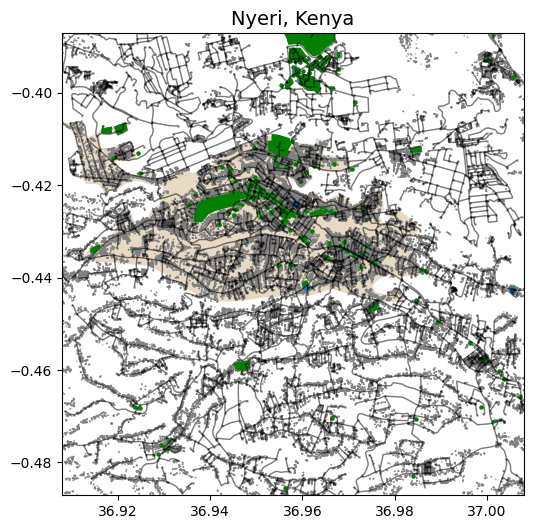

In [35]:
fig, ax = plt.subplots(figsize=(6,6))
area.plot(ax=ax, color="tan", alpha=0.5)
buildings.plot(ax=ax, facecolor="gray", edgecolor="gray")
edges.plot(ax=ax, linewidth=1, edgecolor="black", alpha=0.3)
nodes.plot(ax=ax, color="black", markersize=1, alpha=0.3)
pois.plot(ax=ax, color="green", markersize=5, alpha=1)
ax.set_xlim(west, east)
ax.set_ylim(south, north)
ax.set_title(place_name, fontsize=14)
plt.show()

Sanity check. Head over to
https://www.openstreetmap.org/#map=14/-0.43710/36.95800 and compare
your map against the real thing.

This visualization provides a comprehensive view of the urban landscape,
showing the relationship between different geographic features. The
combination of street networks, buildings, and points of interest gives
us insight into the structure and character of the place.

## Features for Machine Learning

<span class="editsection-bracket" style="">\[</span><span
class="editsection"
style=""><a href="https://github.com/lawrennd/snippets/edit/main/_datasets/includes/osm-feature-extraction.md" target="_blank" onclick="ga('send', 'event', 'Edit Page', 'Edit', 'https://github.com/lawrennd/snippets/edit/main/_datasets/includes/osm-feature-extraction.md', 13);">edit</a></span><span class="editsection-bracket" style="">\]</span>

We have the POI information on all tourist places structured in a
geodataframe. To work with them in a machine learning algorithm, it will
be easier to convert them to a pandas DataFrame.

In [36]:
import pandas as pd

In [37]:
pois_df = pd.DataFrame(pois)
pois_df['latitude'] = pois_df.apply(lambda row: row.geometry.centroid.y, axis=1)
pois_df['longitude'] = pois_df.apply(lambda row: row.geometry.centroid.x, axis=1)

tourist_places_df = pois_df[pois_df.tourism.notnull()]
print(len(tourist_places_df))
tourist_places_df

53


geometry  \
element id                                                               
node    1170757938                            POINT (36.9727 -0.43766)   
        1170757947                           POINT (36.96098 -0.43254)   
        2968784837                           POINT (36.95744 -0.39769)   
        2968791635                           POINT (36.96321 -0.39448)   
        2968794708                           POINT (36.96311 -0.39337)   
        2968798523                           POINT (36.96474 -0.39325)   
        2968799334                           POINT (36.96487 -0.39317)   
        2968799843                           POINT (36.96554 -0.39221)   
        2968804182                           POINT (36.96234 -0.39365)   
        2968805179                           POINT (36.96178 -0.39452)   
        3078569639                           POINT (36.96417 -0.39372)   
        3078569640                           POINT (36.96558 -0.39241)   
        3078569641                           POINT (36.96417 -0.39425)   
        3078569642                           POINT (36.96399 -0.39497)   
        3078569643                           POINT (36.96472 -0.39279)   
        3078569644                           POINT (36.96384 -0.39218)   
        3078569645                            POINT (36.96481 -0.3927)   
        3078628891                           POINT (36.96266 -0.39336)   
        6081237185                           POINT (36.96774 -0.39494)   
        6215841021                           POINT (36.98916 -0.44968)   
        6215953799                           POINT (36.95761 -0.43736)   
        6215953828                           POINT (36.95638 -0.42602)   
        6216117618                           POINT (36.95034 -0.42047)   
        6216117622                           POINT (36.94892 -0.41982)   
        6216117624                            POINT (36.9485 -0.42004)   
        6216117634                           POINT (36.95034 -0.42586)   
        6216117635                             POINT (36.951 -0.42693)   
        6216117638                           POINT (36.94197 -0.42837)   
        6216117644                           POINT (36.96252 -0.41583)   
        8733475517                            POINT (36.9729 -0.42463)   
        11389724776                          POINT (36.96059 -0.43138)   
        12309386444                          POINT (36.95842 -0.39222)   
        12317661163                          POINT (36.95956 -0.39335)   
way     475675499    POLYGON ((36.9364 -0.42132, 36.93625 -0.42118,...   
        475675500    POLYGON ((36.93706 -0.42181, 36.93709 -0.42189...   
        475675517    POLYGON ((36.9367 -0.4214, 36.9368 -0.42147, 3...   
        475675518    POLYGON ((36.93721 -0.42177, 36.93731 -0.42203...   
        1093204657   POLYGON ((36.95403 -0.39359, 36.95401 -0.3935,...   
        1093331235   POLYGON ((36.96429 -0.39497, 36.9642 -0.39489,...   
        1105120586   POLYGON ((36.964 -0.43995, 36.96416 -0.44004, ...   
        1302654607   LINESTRING (36.96089 -0.39425, 36.9609 -0.3941...   
        1392850273   POLYGON ((36.95735 -0.39718, 36.95734 -0.39739...   
        1392850472   POLYGON ((36.95712 -0.39739, 36.95727 -0.39739...   
        1392850593   POLYGON ((36.95733 -0.39817, 36.95751 -0.39817...   
        1392851878   POLYGON ((36.95667 -0.39822, 36.95667 -0.39844...   
        1392852102   POLYGON ((36.95707 -0.39897, 36.95723 -0.39897...   
        1392852103   POLYGON ((36.95663 -0.39886, 36.95663 -0.39891...   
        1393104860   POLYGON ((36.9652 -0.39294, 36.9656 -0.39258, ...   
        1393104861   POLYGON ((36.96521 -0.39254, 36.96531 -0.39244...   
        1393104862   POLYGON ((36.96551 -0.39226, 36.96561 -0.39217...   
        1393105520   POLYGON ((36.9651 -0.39222, 36.96519 -0.39213,...   
        1426106486   POLYGON ((36.93632 -0.42135, 36.93621 -0.42147...   
        1426106487   POLYGON ((36.93629 -0.42126, 36.93614 -0.4214

Now we can create a feature vector by counting different types of points
of interest. This transforms the geographic data into numerical features
that machine learning algorithms can work with.

In [38]:
poi_types = [
    ("amenity", None),
    ("amenity", "school"),
    ("amenity", "hospital"),
    ("amenity", "restaurant"),
    ("amenity", "cafe"),
    ("shop", None),
    ("tourism", None),
    ("tourism", "hotel"),
    ("tourism", "museum"),
    ("leisure", None),
    ("leisure", "park"),
    ("historic", None),
    ("amenity", "place_of_worship"),
]

poi_counts = {}

for key, value in poi_types:
    if key in pois_df.columns:
        if value:  # count only that value
            poi_counts[f"{key}:{value}"] = (pois_df[key] == value).sum()
        else:  # count any non-null entry
            poi_counts[key] = pois_df[key].notnull().sum()
    else:
        poi_counts[f"{key}:{value}" if value else key] = 0

poi_counts_df = pd.DataFrame(list(poi_counts.items()), columns=["POI Type", "Count"])
poi_counts_df # feature vector

,POI Type,Count
0,amenity,176
1,amenity:school,29
2,amenity:hospital,9
3,amenity:restaurant,16
4,amenity:cafe,3
5,shop,14
6,tourism,53
7,tourism:hotel,17
8,tourism:museum,1
9,leisure,29


This creates a feature vector that represents the characteristics of a
place through the count of different amenities and points of interest.
Such features can capture the economic, cultural, and social aspects of
different locations.

### Exercise 1

<span class="editsection-bracket" style="">\[</span><span
class="editsection"
style=""><a href="https://github.com/lawrennd/snippets/edit/main/_datasets/includes/osm-ml-dataset-construction.md" target="_blank" onclick="ga('send', 'event', 'Edit Page', 'Edit', 'https://github.com/lawrennd/snippets/edit/main/_datasets/includes/osm-ml-dataset-construction.md', 13);">edit</a></span><span class="editsection-bracket" style="">\]</span>

Use the code above to write a function, that given a set of coordinates,
outputs a feature vector.

In [39]:
features = [
    ("building", None),
    ("amenity", None),
    ("amenity", "school"),
    ("amenity", "hospital"),
    ("amenity", "restaurant"),
    ("amenity", "cafe"),
    ("shop", None),
    ("tourism", None),
    ("tourism", "hotel"),
    ("tourism", "museum"),
    ("leisure", None),
    ("leisure", "park"),
    ("historic", None),
    ("amenity", "place_of_worship"),
]

def get_feature_vector(latitude, longitude, box_size_km=2, features=features):
    """
    Given coordinates (latitude, longitude), query OpenStreetMap via OSMnx
    and return a feature vector of POI counts within a bounding box.

    Returns a pandas Series instead of DataFrame.
    """
    # Convert km → degrees (approx)
    box_width = box_size_km / 111.0
    box_height = box_size_km / 111.0

    north = latitude + box_height / 2
    south = latitude - box_height / 2
    west = longitude - box_width / 2
    east = longitude + box_width / 2
    bbox = (west, south, east, north)

    # OSM query tags
    tags = {
        "amenity": True,
        "building": True,
        "historic": True,
        "leisure": True,
        "shop": True,
        "tourism": True,
    }

    try:
        pois = ox.features_from_bbox(bbox, tags)
        pois_df = pd.DataFrame(pois)

        poi_counts = {}
        for key, value in features:
            col_name = f"{key}:{value}" if value else key
            if key in pois_df.columns:
                if value:
                    poi_counts[col_name] = (pois_df[key] == value).sum()
                else:
                    poi_counts[col_name] = pois_df[key].notnull().sum()
            else:
                poi_counts[col_name] = 0

        # Ensure consistent ordering
        column_names = [f"{key}:{value}" if value else key for key, value in features]
        ordered_counts = [poi_counts.get(col, 0) for col in column_names]

        return pd.Series(ordered_counts, index=column_names)

    except Exception as e:
        print(f"Error querying coordinates ({latitude}, {longitude}): {str(e)}")
        column_names = [f"{key}:{value}" if value else key for key, value in features]
        return pd.Series([0] * len(features), index=column_names)


You will want it to query the area around the following cities.

In [40]:
cities_kenya = {
    "Nyeri, Kenya": {"latitude": -0.4371, "longitude": 36.9580},
    "Nairobi, Kenya": {"latitude": -1.2921, "longitude": 36.8219},
    "Mombasa, Kenya": {"latitude": -4.0435, "longitude": 39.6682},
    "Kisumu, Kenya": {"latitude": -0.0917, "longitude": 34.7680}
}

cities_england = {
    "Cambridge, England": {"latitude": 52.2053, "longitude": 0.1218},
    "London, England": {"latitude": 51.5072, "longitude": -0.1276},
    "Sheffield, England": {"latitude": 53.3811, "longitude": -1.4701},
    "Oxford, England": {"latitude": 51.7520, "longitude": -1.2577},
}

In [41]:
def get_city_features(cities, box_size_km=2):
    results = {}
    for city, coords in cities.items():
        lat, lon = coords["latitude"], coords["longitude"]
        print(f"Processing {city}...")
        results[city] = get_feature_vector(lat, lon, box_size_km=box_size_km)
    return pd.DataFrame(results).T

kenya_features = get_city_features(cities_kenya, box_size_km=2)
england_features = get_city_features(cities_england, box_size_km=2)

print("\nKenyan Cities Feature Vectors:")
display(kenya_features)

print("\nEnglish Cities Feature Vectors:")
display(england_features)


Processing Nyeri, Kenya...
Processing Nairobi, Kenya...
Processing Mombasa, Kenya...
Processing Kisumu, Kenya...
Processing Cambridge, England...
Processing London, England...
Processing Sheffield, England...
Processing Oxford, England...

Kenyan Cities Feature Vectors:


,building,amenity,amenity:school,amenity:hospital,amenity:restaurant,amenity:cafe,shop,tourism,tourism:hotel,tourism:museum,leisure,leisure:park,historic,amenity:place_of_worship
"Nyeri, Kenya",3364,10,0,0,2,0,1,4,2,1,1,0,0,2
"Nairobi, Kenya",1862,432,11,1,69,14,72,35,19,6,17,6,11,10
"Mombasa, Kenya",1033,90,17,2,7,6,14,23,17,0,33,2,0,8
"Kisumu, Kenya",5103,242,34,12,6,3,127,20,14,0,21,0,0,29



English Cities Feature Vectors:


,building,amenity,amenity:school,amenity:hospital,amenity:restaurant,amenity:cafe,shop,tourism,tourism:hotel,tourism:museum,leisure,leisure:park,historic,amenity:place_of_worship
"Cambridge, England",2173,1338,9,0,88,61,368,105,11,8,180,12,33,42
"London, England",2665,2427,10,4,581,224,958,276,57,10,93,21,229,25
"Sheffield, England",1438,1784,1,0,105,109,493,107,17,6,378,10,18,20
"Oxford, England",2215,1277,7,0,73,96,326,159,19,10,238,11,78,51


### Exercise 2

Here we will collect the feature vectors for all cities into one
dataset. If you wrote the above code well, the following should just run
- but do take a minute to understand what’s happening.

### Exercise 2 Answer

Write your answer to Exercise 2 here

In [42]:
pd.set_option('future.no_silent_downcasting', True)

In [43]:
def build_feature_dataframe(city_dicts, features, box_size_km=1):
    results = {}
    for country, cities in city_dicts:
        for city, coords in cities.items():
            vec = get_feature_vector(
                coords["latitude"],
                coords["longitude"],
                box_size_km=box_size_km,
                features=features
            )
            vec["country"] = country
            results[city] = vec
    return pd.DataFrame(results).T

df = build_feature_dataframe(city_dicts=[("Kenya", cities_kenya), ("England", cities_england)], features=features,box_size_km=1)

X = df.drop(columns="country").fillna(0)
y = df["country"]

## Dimensionality Reduction and Visualization

<span class="editsection-bracket" style="">\[</span><span
class="editsection"
style=""><a href="https://github.com/lawrennd/snippets/edit/main/_ml/includes/osm-city-classification.md" target="_blank" onclick="ga('send', 'event', 'Edit Page', 'Edit', 'https://github.com/lawrennd/snippets/edit/main/_ml/includes/osm-city-classification.md', 13);">edit</a></span><span class="editsection-bracket" style="">\]</span>

Dimensionality reduction is a technique used to take data with many
features and compress it into a smaller set of new features that still
capture most of the important patterns. It is not covered in this
practical, but it is very useful for visualising complex datasets in two
or three dimensions, making it easier to spot structure, clusters, or
similarities between observations. We will use it to quickly visualise
the feature vectors we have.

In [44]:
from sklearn.decomposition import PCA

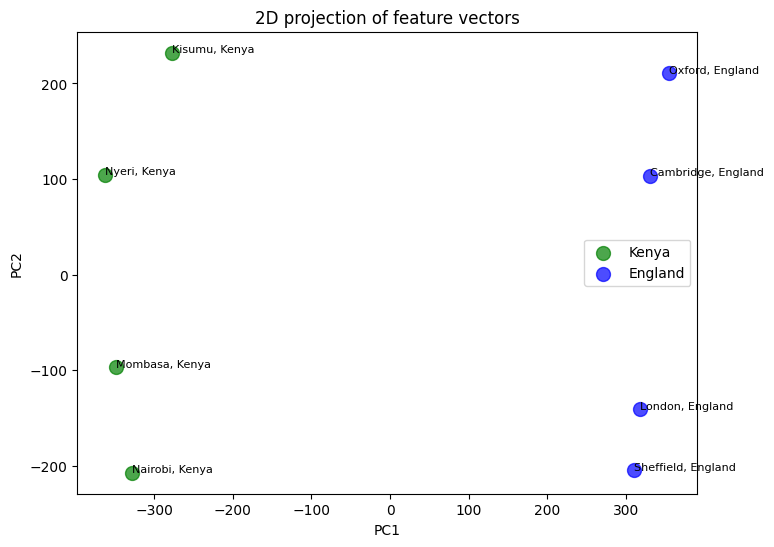

In [45]:
pca = PCA(n_components=2)
X_proj = pca.fit_transform(X)
plt.figure(figsize=(8,6))
for country, color in [("Kenya", "green"), ("England", "blue")]:
    mask = (y == country)
    plt.scatter(X_proj[mask, 0], X_proj[mask, 1],
                label=country, color=color, s=100, alpha=0.7)

for i, city in enumerate(df.index):
    plt.text(X_proj[i,0]+0.02, X_proj[i,1], city, fontsize=8)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("2D projection of feature vectors")
plt.legend()
plt.show()

The visual separation between Kenyan and English cities makes it clear
that a machine learning approach should be successful in classifying
areas as either Kenya or England based on features in the area.

Try a simple classification method of your choosing (eg. linear model)
below, and report the results on the test set below:

In [46]:
from sklearn.linear_model import LogisticRegression

In [47]:
clf = LogisticRegression(max_iter=1000)
clf.fit(X, y)

LogisticRegression(max_iter=1000)

## Testing on New Cities

In [48]:
cities_kenya_2 = {
    "Nakuru, Kenya": {"latitude": -0.3031, "longitude": 36.0800},
    "Eldoret, Kenya": {"latitude": 0.5143, "longitude": 35.2698},
    "Meru, Kenya": {"latitude": 0.0463,"longitude": 37.6559},
    "Kakamega, Kenya": {"latitude": 0.2827,"longitude": 34.7519}
}
cities_england_2 = {
    "Birmingham, England": {"latitude": 52.4862, "longitude": -1.8904},
    "Manchester, England": {"latitude": 53.4808, "longitude": -2.2426},
    "Leeds, England": {"latitude": 53.8008, "longitude": -1.5491},
    "Liverpool, England": {"latitude": 53.4084, "longitude": -2.9916}
}

df_test = build_feature_dataframe(city_dicts=[("Kenya", cities_kenya_2), ("England", cities_england_2)], features=features, box_size_km=1)

X_test = df_test.drop(columns="country").fillna(0)
y_test = df_test["country"]

In [50]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

y_pred = clf.predict(X_test)

print("Accuracy on test set:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

# actual vs predicted
df_results = df_test.copy()
df_results["Predicted"] = y_pred
df_results[["country", "Predicted"]]


Accuracy on test set: 1.0

Classification Report:
               precision    recall  f1-score   support

     England       1.00      1.00      1.00         4
       Kenya       1.00      1.00      1.00         4

    accuracy                           1.00         8
   macro avg       1.00      1.00      1.00         8
weighted avg       1.00      1.00      1.00         8


Confusion Matrix:
 [[4 0]
 [0 4]]


,country,Predicted
"Nakuru, Kenya",Kenya,Kenya
"Eldoret, Kenya",Kenya,Kenya
"Meru, Kenya",Kenya,Kenya
"Kakamega, Kenya",Kenya,Kenya
"Birmingham, England",England,England
"Manchester, England",England,England
"Leeds, England",England,England
"Liverpool, England",England,England


from matplotlib import pyplot as plt
import seaborn as sns
_df_0.groupby('index').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_1.groupby('country').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_2.groupby('Predicted').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['country'].value_counts()
    for x_label, grp in _df_3.groupby('index')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('index')
_ = plt.ylabel('country')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Predicted'].value_counts()
    for x_label, grp in _df_4.groupby('country')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('country')
_ = plt.ylabel('Predicted')

That probably worked!

## Dataset Representativeness

<span class="editsection-bracket" style="">\[</span><span
class="editsection"
style=""><a href="https://github.com/lawrennd/snippets/edit/main/_data-science/includes/osm-dataset-representativeness.md" target="_blank" onclick="ga('send', 'event', 'Edit Page', 'Edit', 'https://github.com/lawrennd/snippets/edit/main/_data-science/includes/osm-dataset-representativeness.md', 13);">edit</a></span><span class="editsection-bracket" style="">\]</span>

But are we sure that we’re seperating for the right reasons? A brief
look at the data above shows us that the England cities have a lot more
OSM features in general, and that will probably be the line along which
our algorithm will end up separating the data. Let’s validate on a very
different set of English towns.

Make sure your code in Exercise 3 handles the case when no features are
found!

In [51]:
cities_england_3 = {
    "Corbridge, England": {"latitude": 54.9740, "longitude": -2.0180},
    "Hexworthy, England": {"latitude": 50.5400, "longitude": -3.8950},
    "Ruckland, England": {"latitude": 53.3000, "longitude": 0.0000},
    "Malmesbury, England": {"latitude": 51.5850, "longitude": -2.0980}
}

df_test_3 = build_feature_dataframe(city_dicts=[ ("England", cities_england_3)], features=features,box_size_km=1)

X_test_3 = df_test_3.drop(columns="country").fillna(0)
y_test_3 = df_test_3["country"]
y_pred_3 = clf.predict(X_test_3)
pd.Series(y_pred_3, index=X_test_3.index)

Error querying coordinates (53.3, 0.0): No matching features. Check query location, tags, and log.


,0
"Corbridge, England",Kenya
"Hexworthy, England",England
"Ruckland, England",Kenya
"Malmesbury, England",England


What happens when we test on small English towns? This reveals an
important issue in machine learning: *dataset representativeness*. Our
model may be learning to distinguish between large, well-documented
cities in Kenya versus large, well-documented cities in England, rather
than learning the true cultural and geographic differences between the
countries.

### Exercise 3

Based on what you found above, discuss what makes a dataset
representative. What other aspects of the analysis could we improve on?
Come up with a better set of English and Kenyan places to include in
your training data, and improve on the analysis above to find real
differences between these places as seen through openstreetmaps.

Consider the following questions:

1.  *Sampling bias*: Are we comparing like with like? Large cities
    vs. small towns?
2.  *Feature selection*: Are we using features that reflect genuine
    cultural/geographic differences?
3.  *Data availability*: Does OpenStreetMap have equal coverage in both
    countries?
4.  *Urban vs. rural*: Should we control for population size or urban
    development level?
5.  \*\*conomic factors\*: Are we inadvertently learning to distinguish
    economic development levels?

### Exercise 3 Answer

Write your answer to Exercise 3 here

In [ ]:
# TODO: discuss

In [25]:
cities_england_new = {} # TODO
cities_kenya_new = {} # TODO
features_new = [] # TODO

df_test_3a = build_feature_dataframe(city_dicts=[ ("England", cities_england_3)], features=features,box_size_km=1)
X_test_3a = df_test_3a.drop(columns="country").fillna(0)
# y_test_3a = df_test_3a["country"]

df_new = build_feature_dataframe(city_dicts=[("Kenya", cities_kenya_new), ("England", cities_england_new)], features=features_new,box_size_km=1)
X_new = df_new.drop(columns="country").fillna(0)
y_new = df_new["country"]

clf = LogisticRegression(max_iter=1000)
clf.fit(X_new, y_new)

y_pred_new = clf.predict(X_test_3a)
pd.Series(y_pred_new, index=X_test_3a.index)

NameError: name 'cities_england_3' is not defined

A representative dataset requires careful consideration of sampling
strategy, ensuring that we capture the true diversity within each class
while controlling for confounding variables that might lead to spurious
correlations.

## Access, Assess, Address Framework

<span class="editsection-bracket" style="">\[</span><span
class="editsection"
style=""><a href="https://github.com/lawrennd/snippets/edit/main/_data-science/includes/osm-access-assess-address.md" target="_blank" onclick="ga('send', 'event', 'Edit Page', 'Edit', 'https://github.com/lawrennd/snippets/edit/main/_data-science/includes/osm-access-assess-address.md', 13);">edit</a></span><span class="editsection-bracket" style="">\]</span>

The Access-Assess-Address framework provides a systematic approach to
data science projects:

-   **Access**: How do we get the data? This includes APIs, web
    scraping, database queries, file formats, etc.
-   **Assess**: How do we evaluate data quality, understand its
    structure, and validate our assumptions?
-   **Address**: How do we answer the specific question or solve the
    problem at hand?

## Applying the Framework

Using the lessons from the article, have a look at the functionality you
created, and identify generalisable Access, Assess and Address
functionality that could come in useful in the future.

**Access functionality**

What we’ve created: - Connection to OpenStreetMap API via OSMnx

What we might need to have done: - Legal, ethical considerations.

**Assess functionality**

What we’ve created: - `plot_city_map()`: visualizes OSM data for any
location - `get_feature_vector()`: Extracts quantitative features from
geographic coordinates - Visualization of geographic data to understand
structure - Feature counting and summarization - Dimensionality
reduction for pattern visualization

What we could create - Data quality checks (handling missing data,
failed queries)

**Address functionality**

What we’ve created: - Machine learning pipeline for location
classification - Evaluation on test sets - Analysis of model performance
and potential biases}

## Library

<span class="editsection-bracket" style="">\[</span><span
class="editsection"
style=""><a href="https://github.com/lawrennd/snippets/edit/main/_data-science/includes/osm-access-library.md" target="_blank" onclick="ga('send', 'event', 'Edit Page', 'Edit', 'https://github.com/lawrennd/snippets/edit/main/_data-science/includes/osm-access-library.md', 13);">edit</a></span><span class="editsection-bracket" style="">\]</span>

Consider for example, this reusable library structure:

``` python
# access.py

def get_osm_datapoints(latitude, longitude, box_size_km=2, poi_tags=None):
    # Example function for getting OSM data
    pass

# assess.py  
def plot_city_map(place_name, latitude, longitude, box_size_km=2, poi_tags=None):
    # Access and visualize geographic data
    pass

def get_osm_features(latitude, longitude, box_size_km=2, tags=None):
    # Access raw OSM data
    pass

def get_feature_vector(latitude, longitude, box_size_km=2, features=None):
    # Assess and quantify geographic features
    pass

def visualize_feature_space(X, y, method='PCA'):
    # Assess data distribution and separability
    pass

# address.py
def train_location_classifier(X_train, y_train, model_type='logistic'):
    # Address classification problem
    pass

def evaluate_classifier(model, X_test, y_test):
    # Address evaluation of performance
    pass
```

### Exercise 4

Over the course of this module we will end up reusing a lot of the code
we create. This is on purpose, and a very important aspect of creating
data science pipelines. The goal of this section is to put this idea in
practice.

Have a *skim* through Neil Lawrence’s article on the Access Assess
Address data science framework
[here](https://inverseprobability.com/talks/notes/access-assess-address-a-pipeline-for-automated-data-science.html).

Using the lessons from the article, have a look at the functionality you
created, and identify generalisable Access, Assess and Address
functionality that could come in useful in the future.

Use git to fork this repository:
https://github.com/lawrennd/fynesse_template and include your code in
the `access.py`, `assess.py`, and `address.py` files.

Demonstrate this by importing your repository below and calling a couple
example functions.

This modular approach makes code reusable across different projects and
enables systematic data science workflows. Each module has a clear
responsibility within the overall pipeline.

In [ ]:
# Write your answer to Exercise 4 here


!git clone https://github.com/YOURGITHUBNAME/fynesse_mlfc.git #Replace YOURGITHUBNAME
import sys
sys.path.append("/content/fynesse_mlfc")



Once you have implemented your functions you should be able to call them
to plot the city map.

In [ ]:
import fynesse

In [ ]:
fynesse.assess.plot_city_map('Cambridge, England',  52.2053, 0.1218, 2)

## Bonus

<span class="editsection-bracket" style="">\[</span><span
class="editsection"
style=""><a href="https://github.com/lawrennd/snippets/edit/main/_data-science/includes/osm-access-bonus.md" target="_blank" onclick="ga('send', 'event', 'Edit Page', 'Edit', 'https://github.com/lawrennd/snippets/edit/main/_data-science/includes/osm-access-bonus.md', 13);">edit</a></span><span class="editsection-bracket" style="">\]</span>

If you made changes to the repository after pulling it, you might have
issues getting the changes to take effect in the workbook without
restarting runtime. Use the workaround below:

    import os, subprocess, importlib, sys

    def load_repo(repo):
        local = repo.split("/")[-1]
        if not os.path.exists(local):
            subprocess.run(["git", "clone", f"https://github.com/{repo}.git"], check=True)
        else:
            subprocess.run(["git", "-C", local, "pull"], check=True)
        if local not in sys.path:
            sys.path.insert(0, local)
        mod = importlib.import_module(local)
        importlib.reload(mod)
        return mod

    # Use after making changes
    fynesse = load_repo("TODO/fynesse_TODO")

End of Practical 1A

     _______  __   __  _______  __    _  ___   _  _______  __
    |       ||  | |  ||   _   ||  |  | ||   | | ||       ||  |
    |_     _||  |_|  ||  |_|  ||   |_| ||   |_| ||  _____||  |
      |   |  |       ||       ||       ||      _|| |_____ |  |
      |   |  |       ||       ||  _    ||     |_ |_____  ||__|
      |   |  |   _   ||   _   || | |   ||    _  | _____| | __
      |___|  |__| |__||__| |__||_|  |__||___| |_||_______||__|

## Thanks!

For more information on these subjects and more you might want to check
the following resources.

-   book: [The Atomic
    Human](https://www.penguin.co.uk/books/455130/the-atomic-human-by-lawrence-neil-d/9780241625248)
-   twitter: [@lawrennd](https://twitter.com/lawrennd)
-   podcast: [The Talking Machines](http://thetalkingmachines.com)
-   newspaper: [Guardian Profile
    Page](http://www.theguardian.com/profile/neil-lawrence)
-   blog:
    [http://inverseprobability.com](http://inverseprobability.com/blog.html)

::: {.cell .markdown}

## References